In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Datasets/placement.csv")
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


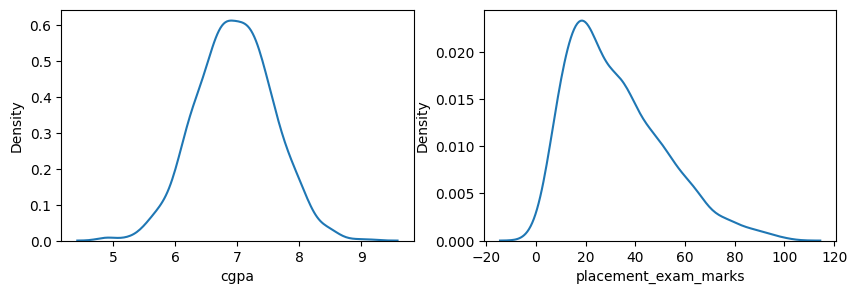

In [3]:
plt.figure(figsize = (10,3))
plt.subplot(1,2,1)
sns.kdeplot(df["cgpa"])

plt.subplot(1,2,2)
sns.kdeplot(df["placement_exam_marks"])

plt.show()

### We can apply Z-SCORE method on cgpa column only we can't apply on marks column because it is not normally distributed

# Approach 1: μ - 3σ and μ + 3σ

In [4]:
upper_limit = df['cgpa'].mean() + 3 * df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3 * df['cgpa'].std()

In [5]:
upper_limit

np.float64(8.808933625397168)

In [6]:
lower_limit

np.float64(5.113546374602832)

In [7]:
df[(df["cgpa"] > 8.80) | (df["cgpa"] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


### After detecting outliers We apply Trimming or Capping techniques

## 1) Trimming

In [8]:
newdf = df[(df["cgpa"] < 8.80) & (df["cgpa"] > 5.11)]
newdf

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


# Approach 2: Z_score = (X−μ) / σ

In [9]:
df['cgpa_Zscore'] = ((df['cgpa']) - (df['cgpa'].mean())) / (df['cgpa'].std())

In [10]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_Zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [11]:
df[(df['cgpa_Zscore'] > 3) | (df['cgpa_Zscore'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_Zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


## 2) Capping

In [12]:
df['cgpa']= np.where(
            df['cgpa'] > upper_limit,
            upper_limit,
            np.where(
                df['cgpa'] < lower_limit,
                lower_limit,
                df["cgpa"]
            )
        )

In [13]:
df.shape

(1000, 4)

In [14]:
df.describe()

,cgpa,placement_exam_marks,placed,cgpa_Zscore
count,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,6.961499,32.225000,0.489000,-1.465494e-16
std,0.612688,19.130822,0.500129,1.000000e+00
min,5.113546,0.000000,0.000000,-3.362960e+00
25%,6.550000,17.000000,0.000000,-6.677081e-01
50%,6.960000,28.000000,0.000000,-2.013321e-03
75%,7.370000,44.000000,1.000000,6.636815e-01
max,8.808934,100.000000,1.000000,3.505062e+00


## Apply IQR method on Placement_exam_marks column bcoz it has skewed distribution

In [15]:
df = pd.read_csv("Datasets/placement.csv")
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [16]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

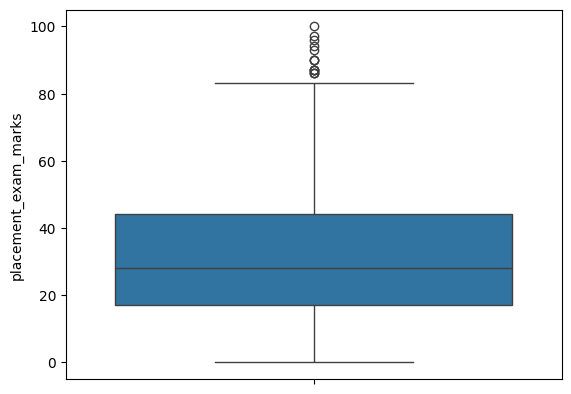

In [17]:
sns.boxplot(df["placement_exam_marks"])
plt.show()

In [18]:
pr25 = df['placement_exam_marks'].quantile(0.25)
pr75 = df['placement_exam_marks'].quantile(0.75)

In [19]:
pr25,pr75

(np.float64(17.0), np.float64(44.0))

In [20]:
IQR = pr75 - pr25

In [21]:
upper_limit = pr75 + 1.5 * IQR
lower_limit = pr25 - 1.5 * IQR

In [22]:
upper_limit,lower_limit

(np.float64(84.5), np.float64(-23.5))

## Trimming

In [23]:
newdf = df[(df['placement_exam_marks'] < upper_limit)]

In [24]:
newdf

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


## Capping

In [25]:
df['placement_exam_marks']= np.where(
            df['placement_exam_marks'] > upper_limit,
            upper_limit,
            np.where(
                df['placement_exam_marks'] < lower_limit,
                lower_limit,
                df["placement_exam_marks"]
            )
        )

In [26]:
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [27]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.136500
std        18.865419
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max        84.500000
Name: placement_exam_marks, dtype: float64

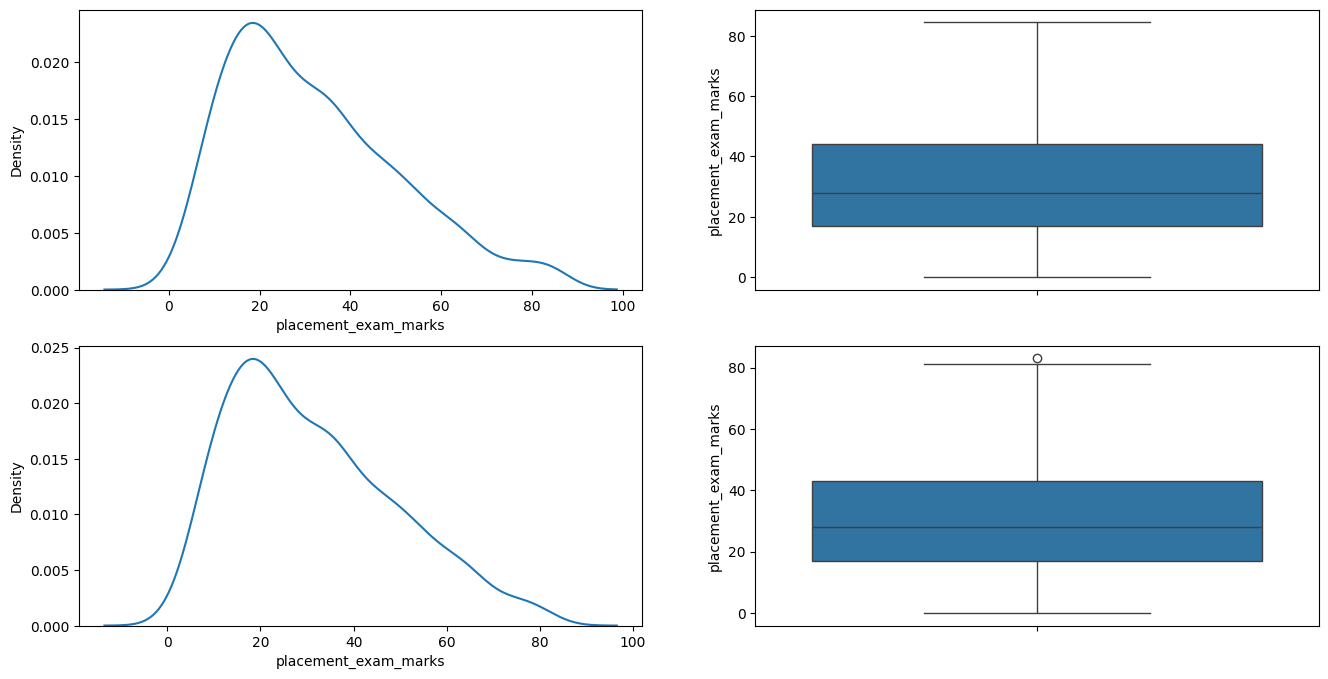

In [28]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.kdeplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.kdeplot(newdf['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(newdf['placement_exam_marks'])

plt.show()